In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

In [2]:
concrete = pd.read_csv('./concrete_data.csv')
concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<Axes: >

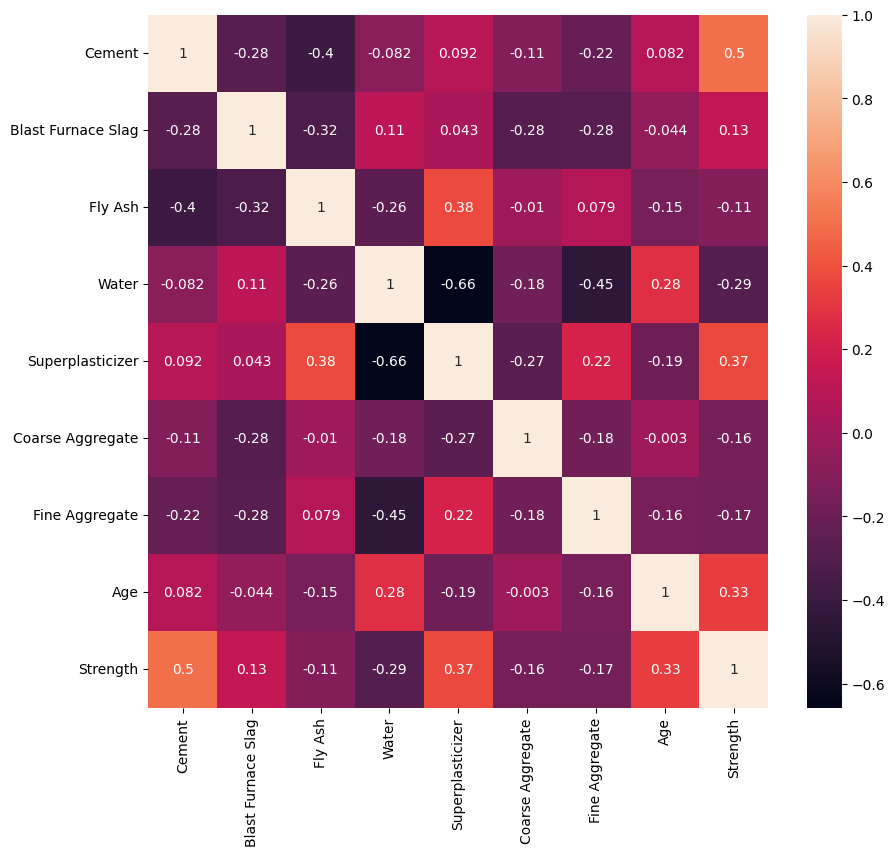

In [3]:
plt.figure(figsize=(10,9))
sns.heatmap(concrete.corr(), annot=True)

In [4]:
target = concrete['Strength']
cement = concrete.iloc[:,0:8]
cement

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [5]:
X_train, X_test , y_train , y_test = train_test_split(cement , target , test_size=0.2, random_state= 42)

scaler = StandardScaler()
    
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns= X_train.columns)   

In [6]:
######Then use different models to fit the dataset
####Linear

model = LinearRegression()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.627553179231485
0.6105238047649741


In [7]:
########RidgeCV

from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge.fit(X_train, y_train)

print(ridge.alpha_)
print(ridge.score(X_test, y_test))

1.0
0.6275758154536313


In [8]:
######Decision Tree
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=15)
tree.fit(X_train, y_train)

print(tree.score(X_test, y_test))
print(tree.score(X_train, y_train))

0.8357731217205697
0.9969156423022941


In [9]:
######RandomForest
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

print(forest.score(X_test, y_test))
print(forest.score(X_train, y_train))

0.8792867957704082
0.9860347180481195


In [10]:
##########SVR
from sklearn.svm import SVR

SVM = SVR(C=100)
SVM.fit(X_train, y_train)

print(SVM.score(X_test, y_test))
print(SVM.score(X_train, y_train))

0.8726873842766911
0.9337968210200338


In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 6, shuffle=True)

scores = cross_val_score(SVR(C=100), X_train, y_train, cv = kfold)

print(scores)
print(np.mean(scores))

[0.85496713 0.89146271 0.8497434  0.88695516 0.86670673 0.85713535]
0.867828411883585


<function matplotlib.pyplot.legend(*args, **kwargs)>

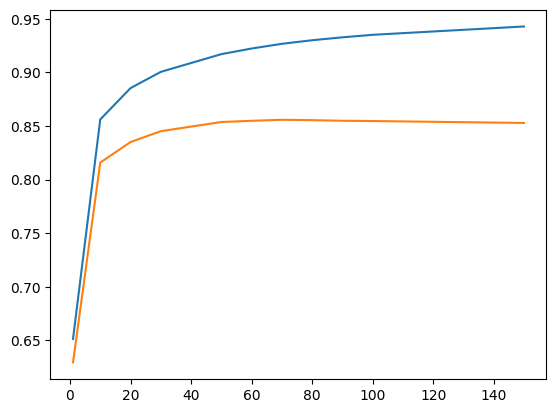

In [12]:
########change parameter C in SVR analysis

from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
   SVR(), 
    X_train,
    y_train,
    param_name = "C",
    param_range= [1,10,20,30,50,60,70,80,90,100, 150],
    cv=5)

param_range = [1,10,20,30,50,60,70,80,90,100, 150]

plt.plot(param_range, np.mean(train_scores, axis = 1), label = 'train')
plt.plot(param_range, np.mean(test_scores, axis = 1), label = 'test')

plt.legend


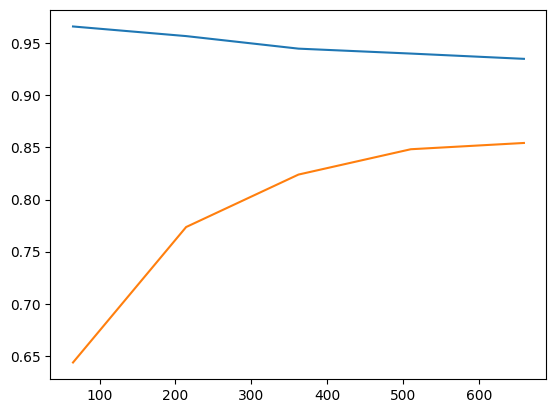

In [13]:
######Learning curve 

from sklearn.model_selection import learning_curve
train_sizes_abs, train_scores, test_scores = learning_curve(SVR(C=100), X_train, y_train)

plt.plot(train_sizes_abs, np.mean(train_scores, axis = 1))
plt.plot(train_sizes_abs, np.mean(test_scores, axis = 1))

In [ ]:
####### Hence Linear model and RidgeCV fit this data not good, while the RandomForest, DesionTrees, and SVR are 
####### better, and the fitting results vary with the parameters in SVR, showed as upper